In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data.PHENO1.glm.linear', sep='\t')

In [4]:
df

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE
0,1,3000185,rs585444580,G,T,T,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
1,1,3000325,rs586608136,G,T,G,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
2,1,3001278,rs581216520,G,A,G,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
3,1,3001490,rs31521921,C,A,A,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
4,1,3004940,rs578487906,C,T,T,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523023,19,61251379,rs223819982,T,C,T,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523024,19,61252455,rs45698052,C,T,C,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523025,19,61254810,rs30451365,G,A,G,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523026,19,61281615,rs31087134,C,T,T,ADD,881,0.021706,0.029286,0.741173,0.458787,.


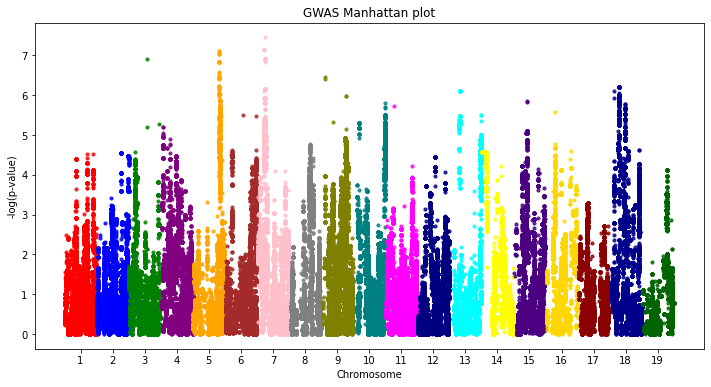

In [8]:
# calculate -log10(p-value)
df['logp'] = - np.log(df['P'])

# create a color map for chromosomes
chrom_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
                5: 'orange', 6: 'brown', 7: 'pink', 8: 'gray',
                9: 'olive', 10: 'teal', 11: 'magenta', 12: 'navy',
                13: 'cyan', 14: 'yellow', 15: 'indigo', 16: 'gold',
                17: 'darkred', 18: 'darkblue', 19: 'darkgreen'}

fig, ax = plt.subplots(figsize=(12, 6))

for chrom, group in df.groupby('#CHROM'):
    groupMaxDist=max(group['POS'])
    ax.scatter(chrom+group['POS']/groupMaxDist, group['logp'], 
               color=chrom_colors[chrom], s=10, alpha=0.8)

plt.xticks(np.arange(19)+1.5, np.arange(19)+1)

ax.set_xlabel('Chromosome')
ax.set_ylabel('-log(p-value)')

ax.set_title('GWAS Manhattan plot')

plt.show()

In [35]:
# find most significant loci
sorted_df = df.sort_values(by='P', ascending=True)
top_loci = sorted_df.head(5)
print(top_loci)

        #CHROM        POS           ID REF ALT A1 TEST  OBS_CT      BETA  \
140995       7   34440906   rs32316278   C   T  T  ADD     881 -0.078065   
139425       7   31080947   rs52415094   C   T  C  ADD     881  0.072423   
140116       7   33468222  rs262239469   T   C  T  ADD     881  0.075145   
109958       5  125845261   rs29510026   C   T  C  ADD     881 -0.085241   
109959       5  125848548  rs232076353   C   T  T  ADD     881 -0.085241   

              SE   T_STAT         P ERRCODE      logp  
140995  0.022608 -3.45299  0.000581       .  7.450956  
139425  0.021487  3.37060  0.000783       .  7.152721  
140116  0.022312  3.36790  0.000790       .  7.143033  
109958  0.025394 -3.35672  0.000823       .  7.103076  
109959  0.025394 -3.35672  0.000823       .  7.103076  


In [3]:
eigenval=np.loadtxt('data.eigenval')

In [4]:
percentVariance=[i/sum(eigenval) for i in eigenval]

In [5]:
assert(len(eigenval)==len(percentVariance))

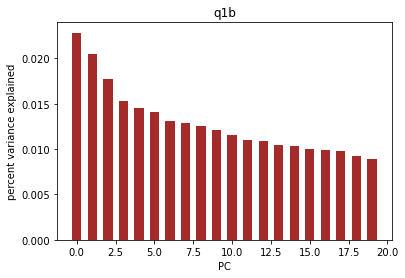

In [6]:
plt.bar(np.arange(20),percentVariance[:20], color ='brown', width = 0.6)
 
plt.xlabel("PC")
plt.ylabel("percent variance explained")
plt.title("q1b")
plt.show()

In [9]:
# first 20 pc explain variance
print("first 20", sum(eigenval[:20])/sum(eigenval))
# first 150 PC explain variance 
print("first 150", sum(eigenval[:150])/sum(eigenval))

first 20 0.2577337662979609
first 150 0.7527233260918342


In [11]:
pca=pd.read_csv('./datapca.PHENO1.glm.linear', sep='\t')
pca

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE
0,1,3000185,rs585444580,G,T,T,ADD,881,0.016122,0.072778,0.221528,0.824744,.
1,1,3000325,rs586608136,G,T,G,ADD,881,0.016122,0.072778,0.221528,0.824744,.
2,1,3001278,rs581216520,G,A,G,ADD,881,0.016122,0.072778,0.221528,0.824744,.
3,1,3001490,rs31521921,C,A,A,ADD,881,0.016122,0.072778,0.221528,0.824744,.
4,1,3004940,rs578487906,C,T,T,ADD,881,0.016122,0.072778,0.221528,0.824744,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523023,19,61251379,rs223819982,T,C,T,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523024,19,61252455,rs45698052,C,T,C,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523025,19,61254810,rs30451365,G,A,G,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523026,19,61281615,rs31087134,C,T,T,ADD,881,0.123692,0.059263,2.087170,0.037220,.


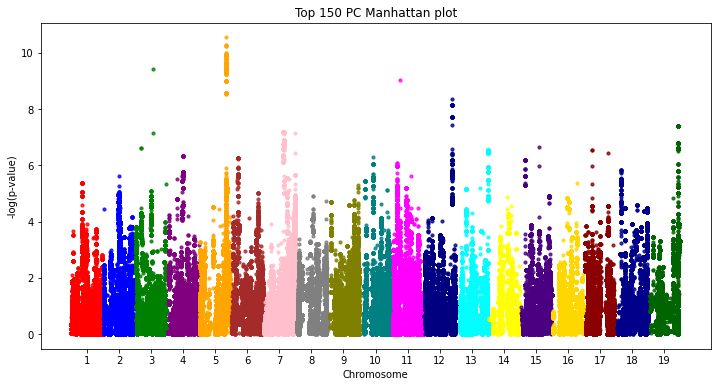

In [13]:
# calculate -log(p-value)
pca['logp'] = - np.log(pca['P'])

fig, ax = plt.subplots(figsize=(12, 6))
for chrom, group in pca.groupby('#CHROM'):
    groupMaxDist=max(group['POS'])
    ax.scatter(chrom+group['POS']/groupMaxDist, group['logp'], 
               color=chrom_colors[chrom], s=10, alpha=0.8)

plt.xticks(np.arange(19)+1.5, np.arange(19)+1)
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log(p-value)')
ax.set_title('Top 150 PC Manhattan plot')

plt.show()

In [12]:
# find most significant loci
sorted_pca = pca.sort_values(by='P', ascending=True)
top_loci = sorted_pca.head(5)
print(top_loci)

        #CHROM        POS           ID REF ALT A1 TEST  OBS_CT      BETA  \
110210       5  127336822   rs47266400   T   C  C  ADD     881 -0.146281   
110212       5  127341426  rs229793615   C   T  T  ADD     881 -0.144530   
110211       5  127337582  rs236230453   T   C  C  ADD     881 -0.144530   
110215       5  127358614   rs45768152   G   A  A  ADD     881 -0.143450   
110214       5  127357917  rs247516541   A   G  G  ADD     881 -0.143450   

              SE   T_STAT         P ERRCODE  
110210  0.034578 -4.23048  0.000026       .  
110212  0.034648 -4.17144  0.000034       .  
110211  0.034648 -4.17144  0.000034       .  
110215  0.034491 -4.15911  0.000036       .  
110214  0.034491 -4.15911  0.000036       .  
